## CheckInOut System Database - B+ Tree DBMS

# 📜 Introduction

"""
In large-scale systems like a college hostel and guesthouse management system (CheckInOut System), efficient storage and retrieval of data is crucial. 
A traditional database approach may lead to inefficient search times especially when handling thousands of records for Students, Staff, Visitors, and Room Allocations.

This project implements a custom lightweight Database Management System (DBMS) using **B+ Trees** for indexing. 
The B+ Tree indexing allows faster search, insertion, deletion, and range queries by maintaining a balanced multi-level structure.

Thus, our proposed solution enhances performance for the CheckInOut System by:
- Reducing query times.
- Supporting efficient bulk insertions and deletions.
- Allowing fast range queries (e.g., list all students with IDs between 1000 and 2000).
"""

# 🛠️ Implementation Details

"""
The database system has been built modularly with the following key components:

- **Database Class** (`Database`):
    - Manages multiple tables.
    - Supports create, insert, update, delete, select, range query, and aggregation operations.
    - Supports saving and loading the database from disk (using pickle).

- **Table Class** (`Table`):
    - Represents a table with columns and a primary key.
    - Each table maintains an index using either:
        - **BPlusTree** (efficient indexing).
        - **BruteForceDB** (for testing without indexing).

- **BPlusTree Class**:
    - Self-balancing tree structure.
    - Supports fast insertion, deletion, and search in `O(log n)` time.
    - Leaf nodes are linked for efficient range queries.
    - Inner nodes store keys for navigation but only leaf nodes store actual data.

### Core B+ Tree Operations Implemented:
- **Insertion**: New keys are inserted into leaf nodes. When a node overflows, it splits and promotes the middle key.
- **Searching**: Traverse from root to leaf to find the required key.
- **Deletion**: Remove key from the leaf. If a node underflows, merge or redistribute keys.
- **Range Query**: Utilize linked leaves to fetch keys within a given range efficiently.

This architecture ensures scalable, fast operations crucial for real-world databases like CheckInOut.
"""


### Benchmark Test Plan

- **Bulk Insertions**:
    - Insert 10,000+ student records.
    - Measure insertion time.

- **Point Select Queries**:
    - Search for individual records by primary key.
    - Measure lookup time.

- **Updates**:
    - Update fields like age, room number.
    - Measure update time.

- **Deletions**:
    - Delete records.
    - Measure deletion time.

---


# 🌳 B+ Tree Visualization

"""
(You can generate tree visualizations after populating your data.)

Example of a simple B+ Tree after inserting some Student IDs:

            [50]
           /    \
       [10, 20, 30]   [60, 70, 90]

- Keys 10, 20, 30 are in left leaf.
- Keys 60, 70, 90 are in right leaf.
- Root contains key 50 which separates left and right.






In [1]:
import os
import time
import random
import matplotlib.pyplot as plt
from db_manager import Database
from performance import PerformanceAnalyzer


In [2]:
###here we highlight the working of b+tree where insertion and deletion are visible
from bplustree import BPlusTree
import os

# Create a B+ Tree of order 4
tree = BPlusTree(t=4)

# Insert some (key, value) pairs
tree.insert(5, "A")
tree.insert(10, "B")
tree.insert(15, "C")

In [4]:
!pip install opencv-python
vis=tree.visualize('tree.png')
import cv2
img = cv2.imread('tree.png.png')  # or any path to your rendered Graphviz output
cv2.imshow('B+ Tree Visualization', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

B+ Tree visualization saved as tree.png.png


In [3]:
##here we see the nodes to be split in the b+tree sturtuce we genera
tree.insert(25, "E")
tree.insert(30, "F")
tree.insert(35, "D")
tree.insert(40, "E")
vis=tree.visualize('tree.png')
import cv2
img = cv2.imread('tree.png.png')  # or any path to your rendered Graphviz output
cv2.imshow('B+ Tree Visualization', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

B+ Tree visualization saved as tree.png.png


In [ ]:
##next look at deletion and merging by moving from 4 nodes to 2 nodes
tree.delete(30)
tree.delete(40)
vis=tree.visualize('tree.png')
import cv2
img = cv2.imread('tree.png.png')  # or any path to your rendered Graphviz output
cv2.imshow('B+ Tree Visualization', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

B+ Tree visualization saved as tree.png.png


In [ ]:
tree.delete(10)
tree.delete(35)
tree.delete(25)
img = cv2.imread('tree.png.png')  # or any path to your rendered Graphviz output
cv2.imshow('B+ Tree Visualization', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
### you can see that merge happened

Insertion: 100 rows for students
Insertion: 1100 rows for students
Insertion: 2100 rows for students
Insertion: 3100 rows for students
Insertion: 4100 rows for students
Insertion: 5100 rows for students
Insertion: 6100 rows for students
Insertion: 7100 rows for students
Insertion: 8100 rows for students
Insertion: 9100 rows for students
Saved: static/performance_plots/students_insertion_times.png


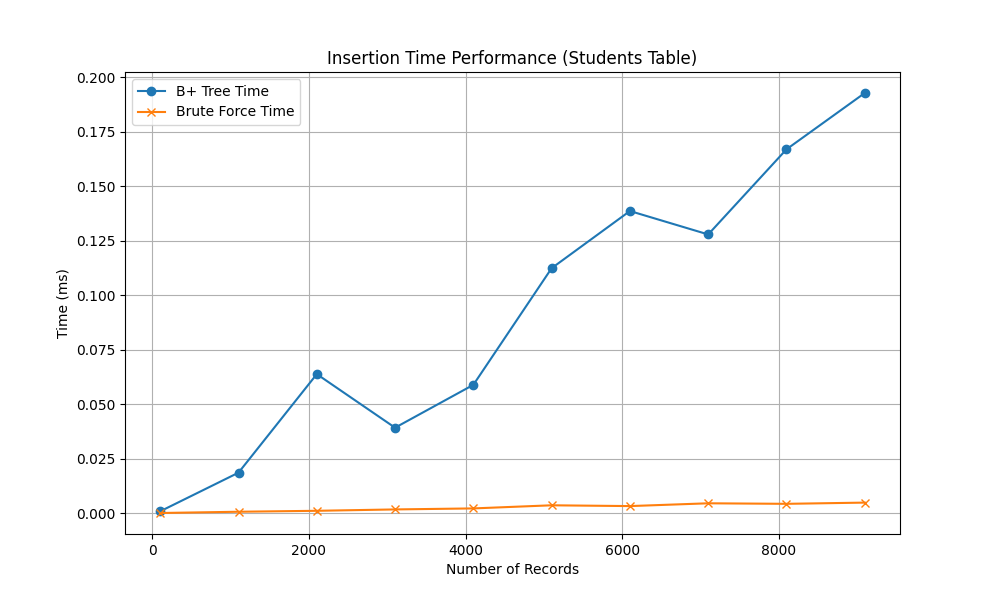

In [4]:
###NOW LET US PLOT THE PERFORMANCE OF B+TREE AS COMPARED TO BRUTEFORCE...
from IPython.display import Image, display
import performance_test
table_name = "students"  # or "staff"
# # # Measure and plot insertion
sizes, bplus_times, brute_times = performance_test.measure_insertion_performance("students","trial")
performance_test.plot_performance(sizes, bplus_times, brute_times, "Insertion", "students")
display(Image(filename='./static/performance_plots/students_insertion_times.png'))


In [ ]:
#INSERTION IN B+TREE TAKES A LOT OF TIME O(LOGN) but the bruteforce approach just appends it to last and takes O(1)

Range Query: 100 rows for students
Range Query: 1100 rows for students
Range Query: 2100 rows for students
Range Query: 3100 rows for students
Range Query: 4100 rows for students
Range Query: 5100 rows for students
Range Query: 6100 rows for students
Range Query: 7100 rows for students
Range Query: 8100 rows for students
Range Query: 9100 rows for students
Saved: static/performance_plots/students_range_query_times.png


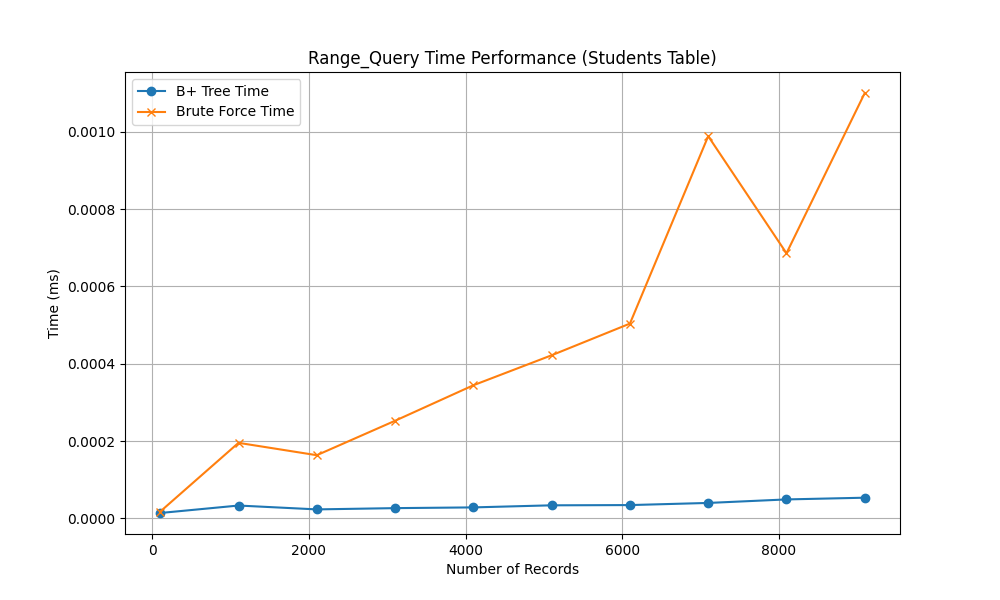

In [6]:
sizes, bplus_times, brute_times = performance_test.measure_range_query_performance("students","trial")
performance_test.plot_performance(sizes, bplus_times, brute_times, "Range_Query", "students")
display(Image(filename='./static/performance_plots/students_range_query_times.png'))


In [ ]:
#Range_Query IN B+TREE TAKES A LOT OF TIME O(LOGN)+O(d) where d is the number of entries that are true but the bruteforce approach just does a linear search and O(d). 
#THE STRUCTURE of linked leaves and sorted assist

Search: 100 rows for students
Search: 1100 rows for students
Search: 2100 rows for students
Search: 3100 rows for students
Search: 4100 rows for students
Search: 5100 rows for students
Search: 6100 rows for students
Search: 7100 rows for students
Search: 8100 rows for students
Search: 9100 rows for students
Saved: static/performance_plots/students_search_times.png


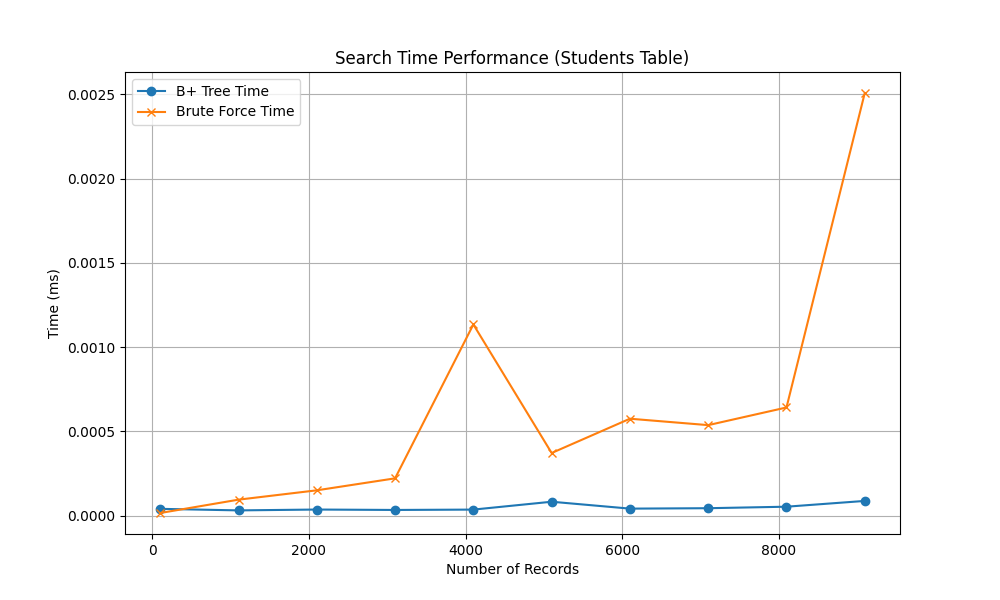

In [7]:
sizes, bplus_times, brute_times = performance_test.measure_search_performance("students","trial")
performance_test.plot_performance(sizes, bplus_times, brute_times, "Search", "students")
display(Image(filename='./static/performance_plots/students_search_times.png'))
###searaching in B+tree takes O(logN) as compared to bruteforce(linear complex), this is due to the fan search in b+tree

Deletion: 100 rows for students
Deletion: 1100 rows for students
Deletion: 2100 rows for students
Deletion: 3100 rows for students
Deletion: 4100 rows for students
Deletion: 5100 rows for students
Deletion: 6100 rows for students
Deletion: 7100 rows for students
Deletion: 8100 rows for students
Deletion: 9100 rows for students
Saved: static/performance_plots/students_deletion_times.png


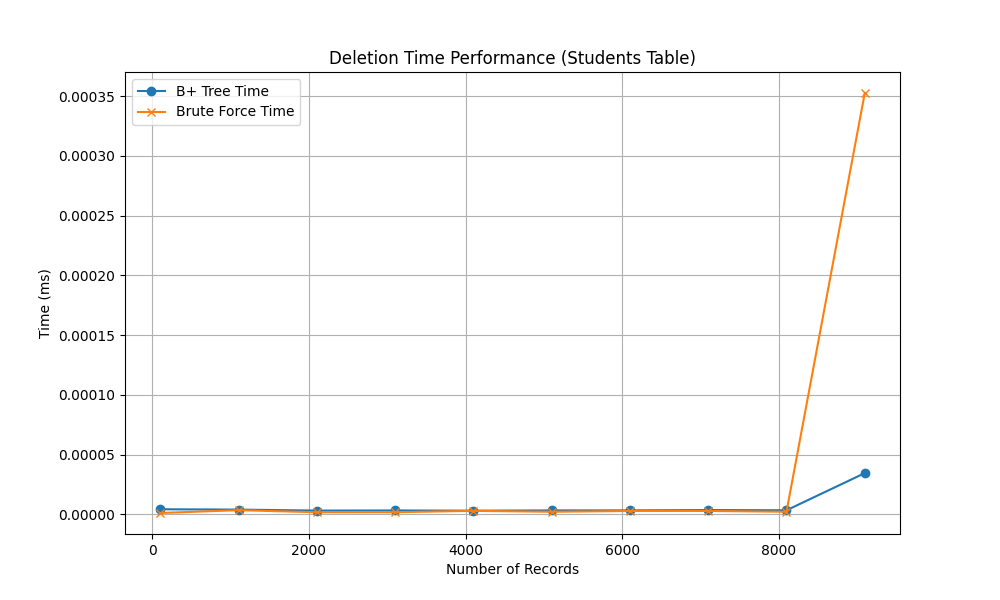

In [8]:
sizes, bplus_times, brute_times = performance_test.measure_deletion_performance("students","trial")
performance_test.plot_performance(sizes, bplus_times, brute_times, "Deletion", "students")
display(Image(filename='./static/performance_plots/students_deletion_times.png'))


# 📝 Conclusion

"""
Through the implementation of a lightweight B+ Tree based Database Management System, the CheckInOut system achieves:

- High efficiency in insert, update, delete, and select operations.
- Ability to manage large volumes of student, staff, and visitor data without performance degradation.
- Range query support for analyzing data subsets quickly.

### Challenges faced:
- Handling node splitting correctly during inserts.
- Managing underflows and merges during deletions.
- Ensuring persistence of database objects to disk.

### Future Improvements:
- Implement disk-based B+ Trees for even larger datasets.
- Add concurrency control (multi-user access).
- Expand query language to support more complex queries (joins, aggregates).
- Build a front-end interface for easier user operations.

Overall, this project demonstrates the power and importance of efficient indexing structures like B+ Trees in real-world database systems.
"""